In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = Rayleigh

$s_2$ = Gaussiana

In [2]:
sources = np.loadtxt(source_path+'/'+'ThirdSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'ThirdMixMatrix.txt')

x = np.loadtxt(obs_path+'ThirdMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [3]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.17053325,  0.3236518 ],
       [ 0.17053325,  1.        ,  0.17980621],
       [ 0.3236518 ,  0.17980621,  1.        ]])

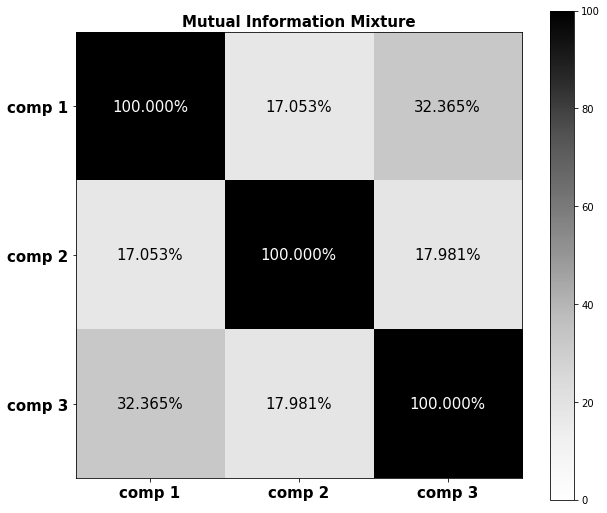

In [4]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run3_mix_MI_100',save=True)

In [5]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.11331483,  0.06662575],
       [ 0.11331483,  1.        ,  0.14710024],
       [ 0.06662575,  0.14710024,  1.        ]])

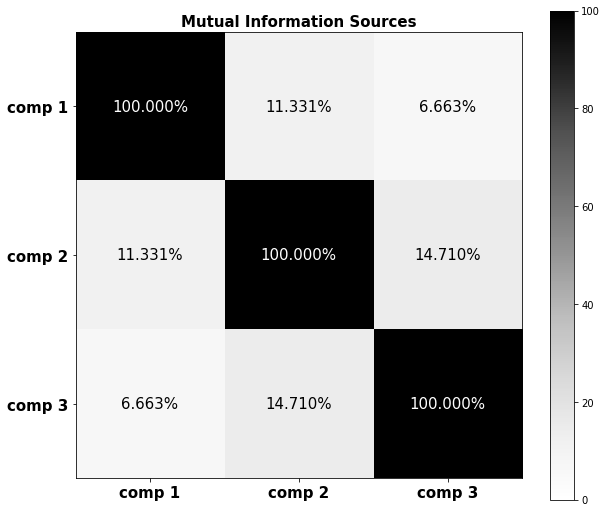

In [6]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run3_sources_MI_100',save=True)

In [7]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.30245789,  0.30880837,  0.20817473],
         [ 0.2480584 ,  0.40970073,  0.24517107],
         [ 0.27764727,  0.25817828,  0.24102014]]),
  array([[ 0.40857011,  0.26548875,  0.33066985],
         [ 0.41638248,  0.34001274,  0.29336909],
         [ 0.22614199,  0.2526634 ,  0.22943421]])],
 array([[ 0.355514  ,  0.28714856,  0.26942229],
        [ 0.33222044,  0.37485674,  0.26927008],
        [ 0.25189463,  0.25542084,  0.23522718]]),
 array([[ 0.25563162,  0.29872497,  0.19677793],
        [ 0.32894134,  0.24049453,  0.16878106],
        [ 0.19472868,  0.23763593,  0.16912248]]))

In [8]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 6
Time to converges the FastICA: 0.004 seconds


In [9]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 =  7.28248012191 E2 =  5.46253158085


In [10]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.14528114,  0.07396694],
       [ 0.14528114,  1.        ,  0.06651262],
       [ 0.07396694,  0.06651262,  1.        ]])

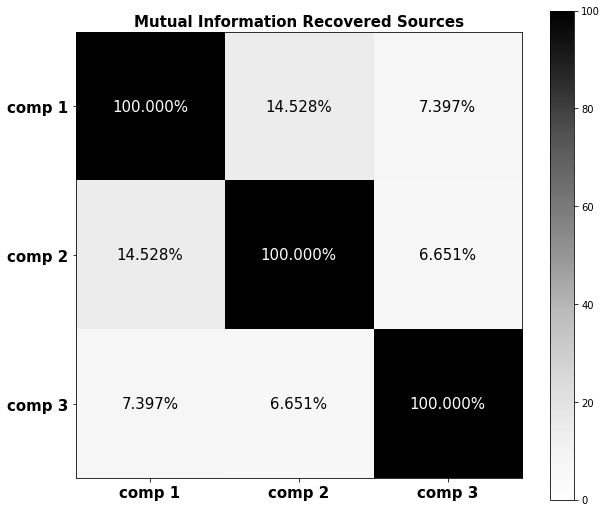

In [11]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run3_reco_MI_100',save=True)

In [12]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.08089062,  0.06732566,  0.51968301],
       [ 0.15828052,  0.45348602,  0.11985295],
       [ 0.71842887,  0.15823581,  0.08946006]])

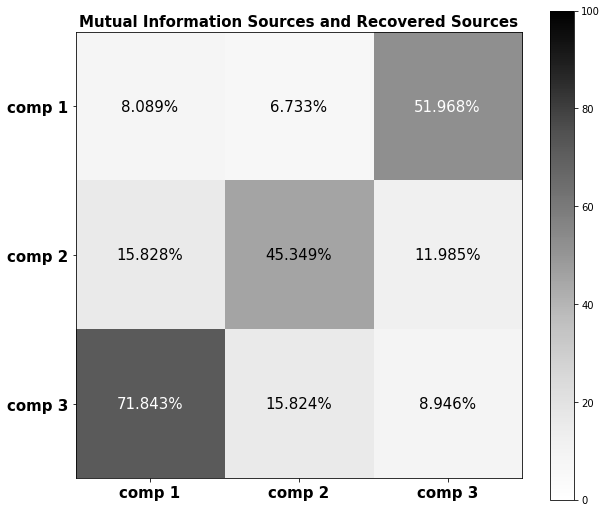

In [13]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run3_sourcesreco_MI_100',save=True)

In [22]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[1,:]
ordened_recovered_sources[2,:] = recovered_sources[0,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.51968301,  0.06732566,  0.08089062],
       [ 0.11985295,  0.45348602,  0.15828052],
       [ 0.08946006,  0.15823581,  0.71842887]])

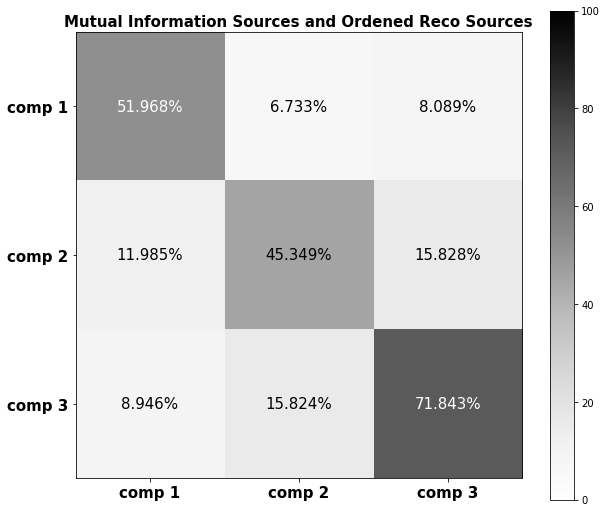

In [23]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run3_sourcesreco_ordened_MI_100',save=True)

In [24]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [25]:
SKL_div,JS_div

(array([[ 0.10608217,  0.27323629,  0.32060435],
        [ 0.19491187,  0.18589091,  0.31241317],
        [ 0.25141008,  0.24226813,  0.31343271]]),
 array([[ 0.06075345,  0.1556089 ,  0.14264613],
        [ 0.16224089,  0.10079428,  0.13031036],
        [ 0.19523454,  0.18315664,  0.17867061]]))

In [26]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.060753 &  0.155609 &  0.142646 \\
1 &  0.162241 &  0.100794 &  0.130310 \\
2 &  0.195235 &  0.183157 &  0.178671 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.106082 &  0.273236 &  0.320604 \\
1 &  0.194912 &  0.185891 &  0.312413 \\
2 &  0.251410 &  0.242268 &  0.313433 \\
\bottomrule
\end{tabular}



In [27]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[  6.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.00000000e-03,   0.00000000e+00,   0.00000000e+00],
       [  7.28248012e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.46253158e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.42107460e+00,   0.00000000e+00,   0.00000000e+00]])

# Using 1000 stats

In [28]:
sources = np.loadtxt(source_path+'/'+'ThirdSource1000Stats.txt')

x = np.loadtxt(obs_path+'ThirdMixture1000Stats.txt')


In [29]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.07779957,  0.27134361],
       [ 0.07779957,  1.        ,  0.09292443],
       [ 0.27134361,  0.09292443,  1.        ]])

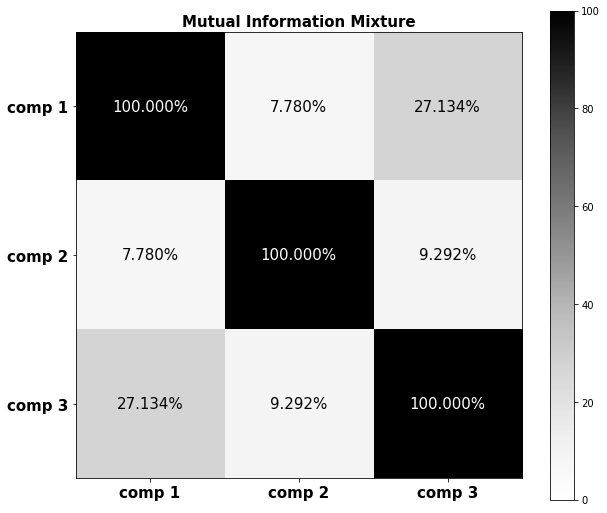

In [30]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run3_mix_MI_1k',save=True)

In [31]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.02333587,  0.01784271],
       [ 0.02333587,  1.        ,  0.06131756],
       [ 0.01784271,  0.06131756,  1.        ]])

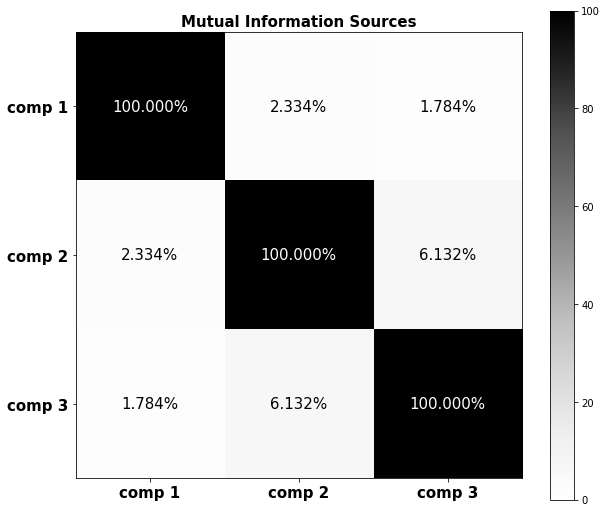

In [32]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run3_sources_MI_1k',save=True)

In [33]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 5
Time to converges the FastICA: 0.005 seconds


In [34]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.0198319 ,  0.09712989],
       [ 0.0198319 ,  1.        ,  0.02357249],
       [ 0.09712989,  0.02357249,  1.        ]])

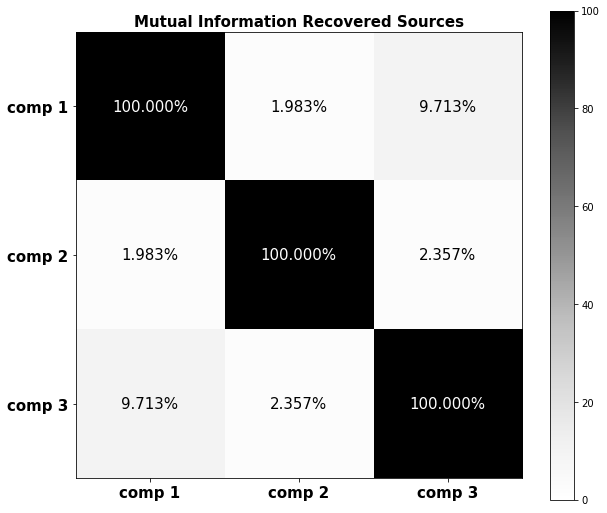

In [35]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run3_reco_MI_1k',save=True)

In [36]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.02173427,  0.71069737,  0.02114043],
       [ 0.21154711,  0.02564304,  0.14439205],
       [ 0.14385151,  0.02821812,  0.25546925]])

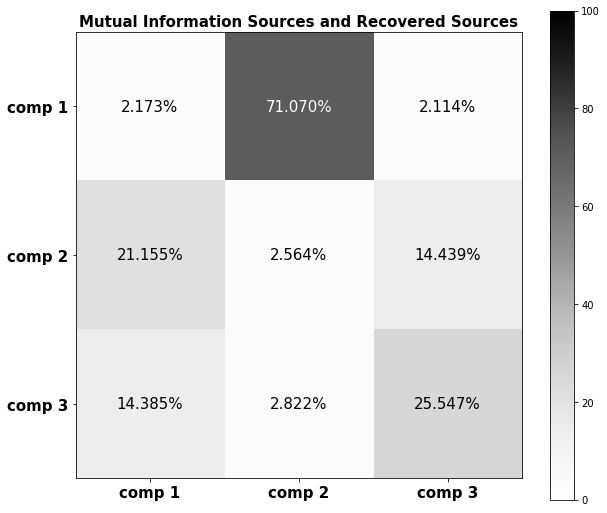

In [37]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run3_sourcesreco_MI_1k',save=True)

In [46]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[1,:]
ordened_recovered_sources[1,:] = recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[2,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.71069737,  0.02173427,  0.02114043],
       [ 0.02564304,  0.21154711,  0.14439205],
       [ 0.02821812,  0.14385151,  0.25546925]])

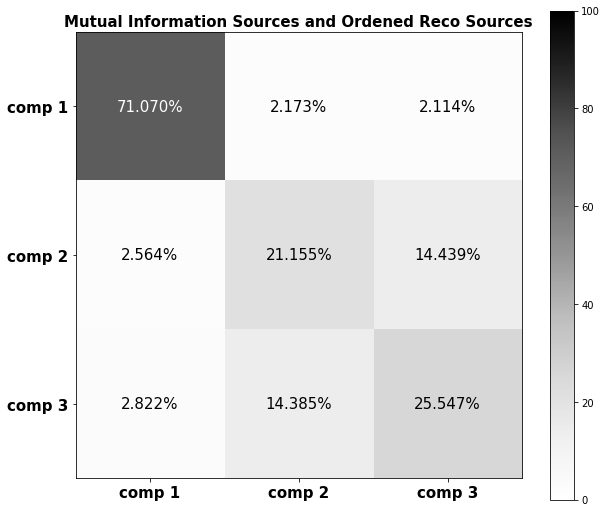

In [47]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run3_sourcesreco_ordened_MI_1k',save=True)

In [48]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [49]:
SKL_div,JS_div

(array([[ 0.11667283,  0.54370315,  0.50866783],
        [ 0.30217869,  0.34470865,  0.31626305],
        [ 0.31886158,  0.26544104,  0.15006709]]),
 array([[ 0.05419945,  0.20037499,  0.19748643],
        [ 0.228227  ,  0.14817024,  0.17865567],
        [ 0.2458596 ,  0.10914319,  0.07930618]]))

In [50]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.054199 &  0.200375 &  0.197486 \\
1 &  0.228227 &  0.148170 &  0.178656 \\
2 &  0.245860 &  0.109143 &  0.079306 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.116673 &  0.543703 &  0.508668 \\
1 &  0.302179 &  0.344709 &  0.316263 \\
2 &  0.318862 &  0.265441 &  0.150067 \\
\bottomrule
\end{tabular}



In [51]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  6.00000000e+00,   5.00000000e+00,   0.00000000e+00],
       [  4.00000000e-03,   5.00000000e-03,   0.00000000e+00],
       [  7.28248012e+00,   4.01850931e+00,   0.00000000e+00],
       [  5.46253158e+00,   2.14820989e+00,   0.00000000e+00],
       [  1.42107460e+00,   1.40494221e+00,   0.00000000e+00]])

# Using 100K stats

In [52]:
sources = np.loadtxt(source_path+'/'+'ThirdSource100000Stats.txt')

x = np.loadtxt(obs_path+'ThirdMixture100000Stats.txt')


In [53]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.04459178,  0.16932891],
       [ 0.04459178,  1.        ,  0.04564399],
       [ 0.16932891,  0.04564399,  1.        ]])

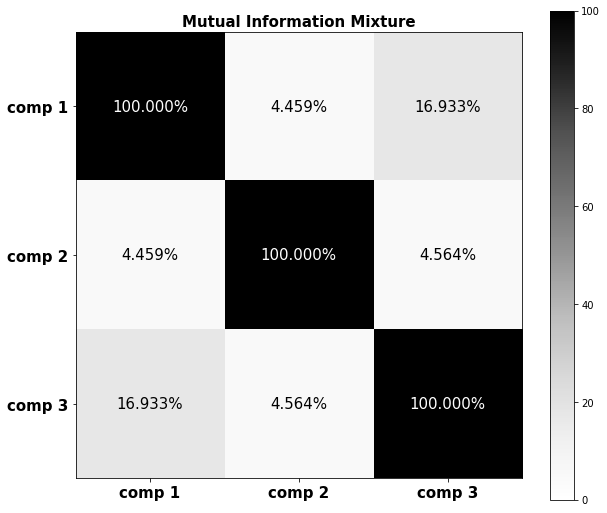

In [54]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run3_mix_MI_100k',save=True)

In [55]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.00275141,  0.00280403],
       [ 0.00275141,  1.        ,  0.01175621],
       [ 0.00280403,  0.01175621,  1.        ]])

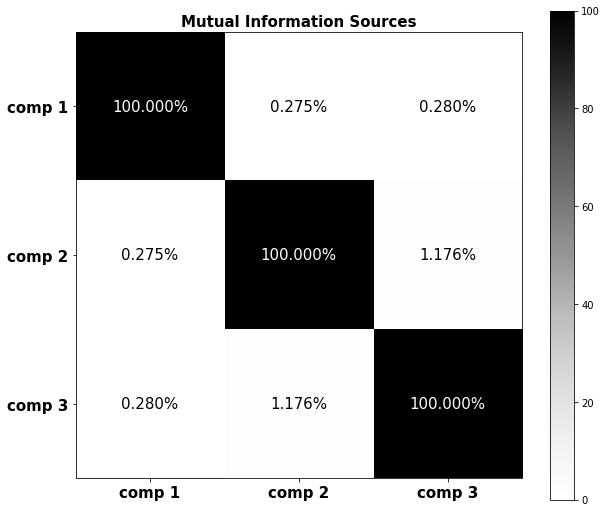

In [56]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run3_sources_MI_100k',save=True)

In [57]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 11
Time to converges the FastICA: 0.276 seconds


In [58]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.00285601,  0.00269082],
       [ 0.00285601,  1.        ,  0.01421162],
       [ 0.00269082,  0.01421162,  1.        ]])

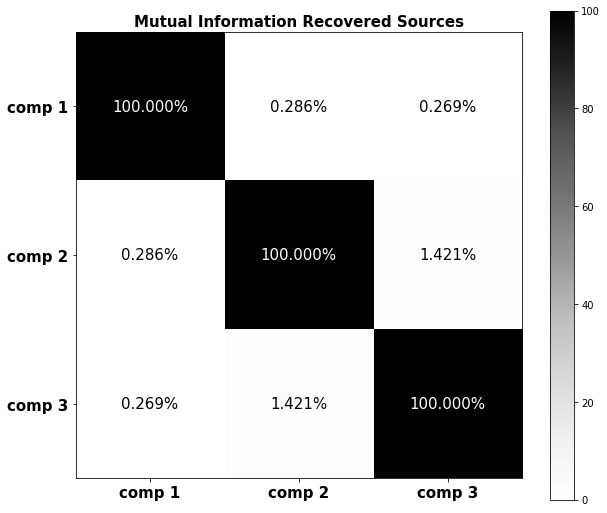

In [59]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run3_reco_MI_100k',save=True)

In [60]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.91093287,  0.00280978,  0.00275227],
       [ 0.00275303,  0.01469797,  0.42914987],
       [ 0.00278495,  0.43877046,  0.017006  ]])

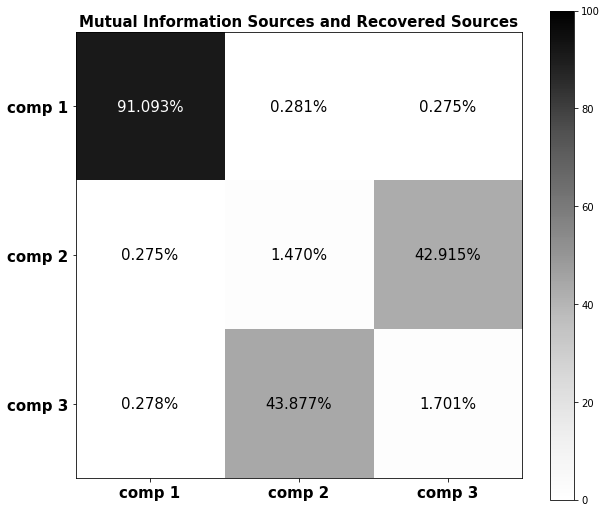

In [61]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run3_sourcesreco_MI_100k',save=True)

In [66]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = -1*recovered_sources[2,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.91093287,  0.00275227,  0.00280978],
       [ 0.00275303,  0.42914987,  0.01469797],
       [ 0.00278495,  0.017006  ,  0.43877046]])

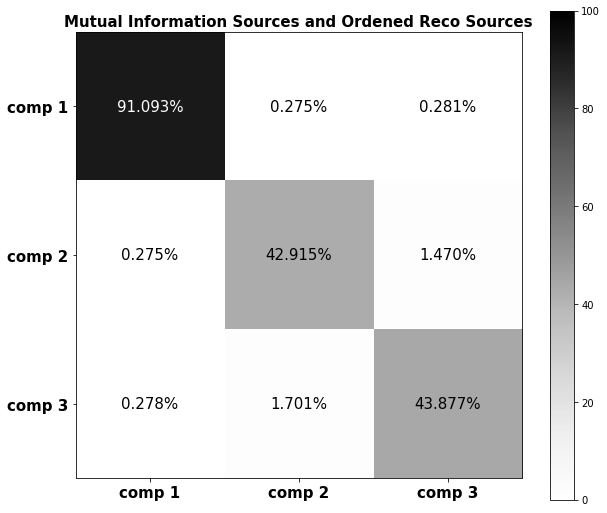

In [67]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run3_sourcesreco_ordened_MI_100k',save=True)

In [68]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [69]:
SKL_div,JS_div

(array([[ 0.02366737,  0.67083561,  0.80098837],
        [ 0.37895727,  0.12282207,  1.02117401],
        [ 0.40324591,  0.69998307,  0.02335376]]),
 array([[ 0.01121439,  0.20161446,  0.20883378],
        [ 0.3436558 ,  0.05020864,  0.3827234 ],
        [ 0.3971809 ,  0.45773335,  0.01305792]]))

In [70]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.011214 &  0.201614 &  0.208834 \\
1 &  0.343656 &  0.050209 &  0.382723 \\
2 &  0.397181 &  0.457733 &  0.013058 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.023667 &  0.670836 &  0.800988 \\
1 &  0.378957 &  0.122822 &  1.021174 \\
2 &  0.403246 &  0.699983 &  0.023354 \\
\bottomrule
\end{tabular}



In [71]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  6.00000000e+00,   5.00000000e+00,   1.10000000e+01],
       [  4.00000000e-03,   5.00000000e-03,   2.76000000e-01],
       [  7.28248012e+00,   4.01850931e+00,   4.45149747e+00],
       [  5.46253158e+00,   2.14820989e+00,   2.44776923e+00],
       [  1.42107460e+00,   1.40494221e+00,   1.44115620e+00]])

In [72]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &          2 \\
\midrule
0 &  6.000000 &  5.000000 &  11.000000 \\
1 &  0.004000 &  0.005000 &   0.276000 \\
2 &  7.282480 &  4.018509 &   4.451497 \\
3 &  5.462532 &  2.148210 &   2.447769 \\
4 &  1.421075 &  1.404942 &   1.441156 \\
\bottomrule
\end{tabular}

